In [1]:
# %run 00_analysis_config.ipynb
import numpy as np
import scipy as sp
from  pylab import *

from tqdm import tqdm

In [2]:
import hepmc_parser as hepmc
import pyhepmc

In [24]:
def parse_hepmc(filename):
    particles = []
    with open(filename) as f:
        while True:
        # for i in tqdm(range(100_00)):
            line = f.readline()
            if not line:
                break    
            line = line.split(" ")

            if (line[0]=="P") and (line[8]=="1"):
                if ((line[2]=="13")|(line[2]=="-13")) :
                    particles.append([float(line[3]), float(line[4]), float(line[5]), float(line[6]), int(line[2])])
        
    # print("finished")
    return particles


def parse_lhe(filename):
    particles = []
    with open(filename) as f:
        while True:
        # for i in tqdm(range(100_00)):
            line = f.readline()
            if not line:
                break    
                
            line = line.split()

            if len(line)==13:
                # particles.append(1)

                # if (line[0]=="13"):
                #     print(line)
                #     break                    
                if ((line[0]=="13")|(line[0]=="-13")) and (line[1]=="1"):
                    particles.append([float(line[6]), float(line[7]), float(line[8])])
    # print("finished")
    return np.array(particles)

In [20]:
filenames = ["scripts/proc_sm_muprod_matched/Events/run_01/tag_2_pythia8_events_nomatch.hepmc",
             "scripts/proc_sm_muprod_matched/Events/run_01/tag_2_pythia8_events_matched.hepmc",
             "scripts/proc_sm_muprod_nomatch/Events/run_01/tag_1_pythia8_events.hepmc"]
labels = ["jet, no match", "jet, matched","no jet"]             

In [21]:
Data={}

for i in range(len(filenames)):
    filename = filenames[i]
    data = np.array(parse_hepmc(filename))
    Data[i] = data

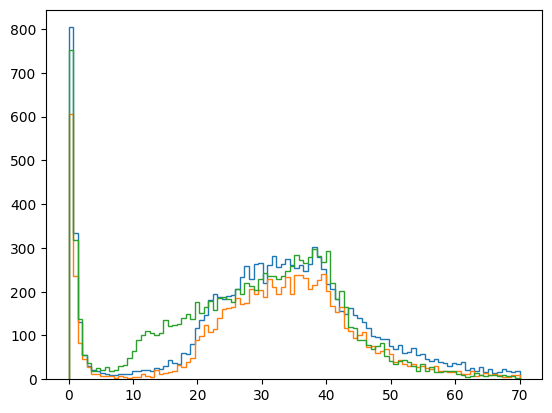

In [22]:
for i in range(len(filenames)):
    particles = Data[i]
    pt = np.linalg.norm(particles[:,:2],axis=1)
    hist(pt, range=(0,70),bins=100, histtype="step");

In [25]:
file_lhe = "scripts/proc_sm_muprod_matched/Events/run_01/unweighted_events.lhe"
lhe_particles=parse_lhe(file_lhe)

file_lhe = "scripts/proc_sm_muprod_nomatch/Events/run_01/unweighted_events.lhe"
lhe_particles_nojet=parse_lhe(file_lhe)

10712
10824
12136 10738
9077 8054
12155 10810


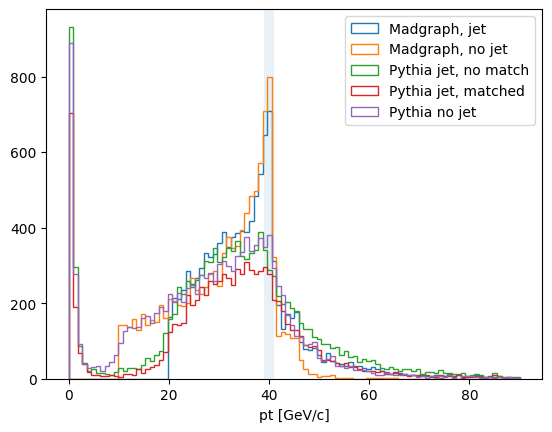

In [63]:
pt_lhe = np.linalg.norm(lhe_particles[:,:2], axis=1)
hist(pt_lhe, range=(0,90),bins=100, histtype="step", label="Madgraph, jet");
print(len(pt_lhe))

pt_lhe = np.linalg.norm(lhe_particles_nojet[:,:2], axis=1)
hist(pt_lhe, range=(0,90),bins=100, histtype="step", label="Madgraph, no jet");
print(len(pt_lhe))

for i in range(len(filenames)):
    particles = Data[i]
    pt = np.linalg.norm(particles[:,:2],axis=1)
    hist(pt, range=(0,90),bins=100, histtype="step", label="Pythia "+labels[i]);
    print(len(pt), sum(pt>5))
    
legend()
xlabel("pt [GeV/c]")
axvspan(39,41, alpha=0.1)

## Check what's going on in Madgraph around pt of 39?

In [35]:
import lhe_parser

In [61]:
file_lhe = "scripts/proc_sm_muprod_nomatch/Events/run_01/unweighted_events.lhe"

file = lhe_parser.EventFile(file_lhe)  

for i in range(350):
    event = file.next()  
    for particle in event:
        pt = np.linalg.norm([particle.px,particle.py])
        if particle.pid in [-13,13] and 39<pt<40:
            print(particle.px,particle.py, pt)
            print(event)

8.1953556605 -38.641629077 39.50113102338389
<event>
 5      1 +1.3252560e+04 8.10095200e+01 7.54677100e-03 1.32621100e-01
        2 -1    0    0  501    0 +0.0000000000e+00 +0.0000000000e+00 +2.1047658916e+01 2.1047658916e+01 0.0000000000e+00 0.0000e+00 -1.0000e+00
       -1 -1    0    0    0  501 -0.0000000000e+00 -0.0000000000e+00 -7.7948604880e+01 7.7948604880e+01 0.0000000000e+00 0.0000e+00 1.0000e+00
       24  2    1    2    0    0 +0.0000000000e+00 +0.0000000000e+00 -5.6900945964e+01 9.8996263796e+01 8.1009521625e+01 0.0000e+00 0.0000e+00
      -13  1    3    3    0    0 +8.1953556605e+00 -3.8641629077e+01 -1.7500060117e+01 4.3204067589e+01 0.0000000000e+00 0.0000e+00 1.0000e+00
       14  1    3    3    0    0 -8.1953556605e+00 +3.8641629077e+01 -3.9400885847e+01 5.5792196207e+01 0.0000000000e+00 0.0000e+00 -1.0000e+00
<mgrwt>
<rscale>  0 0.81009522E+02</rscale>
<asrwt>0</asrwt>
<pdfrwt beam="1">  1        2 0.30068084E-02 0.81009522E+02</pdfrwt>
<pdfrwt beam="2">  1       -1 

In [58]:
# def check_lhe_pt(filename):
#     particles = []
#     with open(filename) as f:
#         # while True:
#         for i in tqdm(range(10_000)):
#             line = f.readline()
#             if not line:
#                 break    
                
#             line = line.split()

#             if len(line)==13:
#                 # particles.append(1)

#                 # if (line[0]=="13"):
#                 #     print(line)
#                 #     break                    
#                 if ((line[0]=="13")|(line[0]=="-13")) and (line[1]=="1"):
#                     # particles.append([float(line[6]), float(line[7]), float(line[8])])
#                     pt = np.linalg.norm([float(line[6]), float(line[7])])
#                     # print(pt)
#                     if abs(pt-40)<1:
#                         print(line)
#     # print("finished")
#     return np.array(particles)

# file_lhe = "scripts/proc_sm_muprod_nomatch/Events/run_01/unweighted_events.lhe"
# check_lhe_pt(file_lhe)

---

In [7]:
def read_hepmc_parent(filename, nread_max=-1, nprint =1000):
    """
    Example:
        # Read one event:
        file = hepmc.HEPMC_EventFile(filename)
        event = file.next()  
        # Then you have event.particles, event.vertex
    """
    file = hepmc.HEPMC_EventFile(filename)  
    
    
    particle_selected_vertex_barcode = []
    particle_selected_vertex_ismuon = []
    particle_selected_vertex_pdg = []

    for ievent, event in enumerate(file):
        if nread_max>0 and ievent+1==nread_max:
            break
        if (ievent+1)%nprint==0:
            print("processed", ievent+1,"events")
        for i in event.particles:
            particle = event.particles[i]
            if particle.pdg in [13,-13] and particle.status==1:
                # print(particle.vertex_barcode)
                # print(particle.barcode, particle.pdg)
                particle_selected_vertex_barcode.append(particle.vertex_barcode)

                # Mark the ones that are directly from another muon
                if particle.vertex_barcode==0:
                    particle_selected_vertex_ismuon.append(True)
                    pass
                    # particle_selected_vertex_pdg.append(particle.pdg)
                else:
                    particle_selected_vertex_ismuon.append(False)
                    particle_selected_vertex_pdg.append(particle.vertex.incomming)    
                    
    return particle_selected_vertex_barcode, particle_selected_vertex_ismuon, particle_selected_vertex_pdg

In [8]:
particle_selected_vertex_barcode, particle_selected_vertex_ismuon, particle_selected_vertex_pdg = read_hepmc_parent(filenames[0], nread_max=1000, nprint=100)

processed 99 events
processed 199 events
processed 299 events
processed 399 events
processed 499 events
processed 599 events
processed 699 events
processed 799 events
processed 899 events
processed 999 events


In [10]:
len(particle_selected_vertex_ismuon)

1222

In [10]:
# particle_selected_vertex_barcode = []
# particle_selected_vertex_ismuon = []
# particle_selected_vertex_pdg = []

# # for ievent in tqdm(range(1000)):
# #     event = file.next()
# for ievent, event in enumerate(file):
#     if ievent+1%999==0:
#         print(ievent)
#     for i in event.particles:
#         particle = event.particles[i]
#         if particle.pdg in [13,-13] and particle.status==1:
#             # print(particle.vertex_barcode)
#             # print(particle.barcode, particle.pdg)
#             particle_selected_vertex_barcode.append(particle.vertex_barcode)

#             # Mark the ones that are directly from another muon
#             if particle.vertex_barcode==0:
#                 particle_selected_vertex_ismuon.append(True)
#                 pass
#                 # particle_selected_vertex_pdg.append(particle.pdg)
#             else:
#                 particle_selected_vertex_ismuon.append(False)
#                 particle_selected_vertex_pdg.append(particle.vertex.incomming)


                
# # print(particle_selected_vertex_barcode)

---
# View event

In [18]:
with pyhepmc.open(filenames[0]) as f:
    for i in range(50):
        event = f.read()
        # pyhepmc.view.savefig(event, f"data/hepmc_event_{i}.svg")
        for p in event.particles:
            if  p.status == 1 and p.pid in [13, -13] and p.momentum.pt()<5:
                # print(1)
                print("pT",p.momentum.pt())
                pyhepmc.view.savefig(event, f"data/hepmc_event_lowpT_{i}.svg")
                

pT 1.1024295075434003
pT 1.1439785967064415
pT 0.32330607639672687
pT 0.3517546588645331
pT 1.4856485470908474
